In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [36]:
# Load the dataset
file_path = '/content/SSL.csv'
data = pd.read_csv(file_path)

In [37]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   THUMB_MCP_angle  INDEX_MCP_angle  MIDDLE_MCP_angle  RING_MCP_angle  \
0       158.850393       166.191120        171.312416      164.417307   
1       179.764919       162.918659        164.688354      158.761507   
2       163.686400       156.874601        168.731120      167.597585   
3       164.877336       157.923103        168.825020      166.714988   
4       162.510311       155.772163        167.382585      167.906615   

   PINKY_MCP_angle  INDEX_PIP_angle  MIDDLE_PIP_angle  RING_PIP_angle  \
0       152.776481       166.274985        168.753093      170.136228   
1       150.168779       165.712954        165.773444      173.676437   
2       155.271677       170.371422        173.189007      178.279313   
3       154.694918       171.259425        173.170858      177.966303   
4       151.483203       164.876201        167.474186      171.706166   

   PINKY_PIP_angle  INDEX_DIP_angle  MIDDLE_DIP_angle  RING_DIP_angle  \
0       170.599224

In [38]:
# Check for missing values and handle them
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

No missing values detected.


In [39]:
# Separate features and labels
if 'LABEL' in data.columns:
    features = data.drop(columns=['LABEL'])  # Assuming the 'label' column represents the target variable
    labels = data['LABEL']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the file contains a 'label' column.")

Features and labels separated successfully.


In [40]:
# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)
print("Features standardized successfully.")

Features standardized successfully.


In [41]:
# Perform PCA
n_components = 2  # Number of principal components for visualization
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(standardized_features)

In [42]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['LABEL'] = labels

In [43]:
# Save PCA results for inspection (optional)
pca_df.to_csv('PCA_results.csv', index=False)

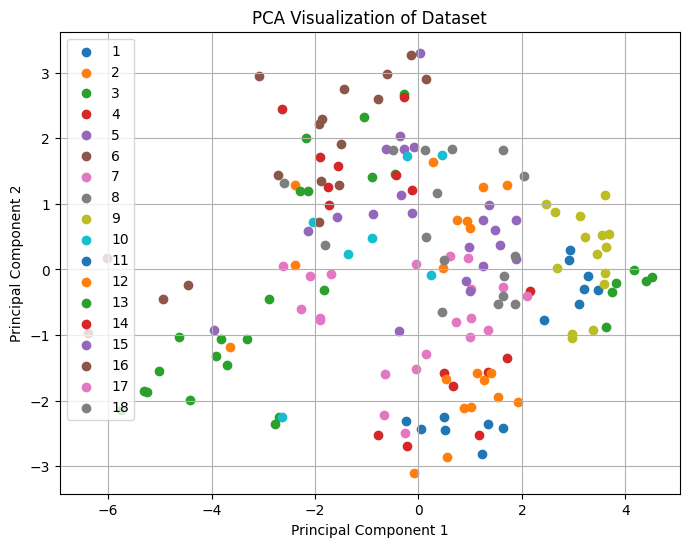

In [52]:
# Visualize the principal components
plt.figure(figsize=(8, 6))
for label in pca_df['LABEL'].unique():
    subset = pca_df[pca_df['LABEL'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.title('PCA Visualization of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [53]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.33984881 0.13633539]


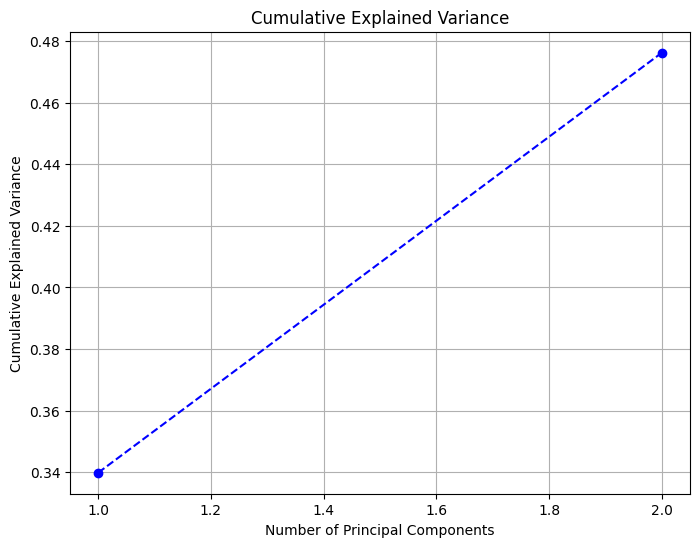

In [54]:
# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()